

<h3 align="center">Hồi quy tuyến tính</h3>

---------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the data
car = pd.read_csv('D:\DOWNLOAD\CAR_ANYLIST\Car_Prices\Car_preproccesed.csv')

car.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Hồi quy tuyến tính


In [4]:
# Khai báo biến tính năng và mục tiêu
X = car.drop('log_price', axis=1)
y = car['log_price']

X.shape, y.shape

((3867, 17), (3867,))

### Mở rộng dữ liệu


Lưu ý: Không phải lúc nào cũng xem xét phương pháp hay nhất để thay đổi tỷ lệ biến giả vì khi thay đổi tỷ lệ, chúng sẽ mất hết thông tin. Nhưng ở đây tôi sẽ bỏ qua điều đó và sẽ coi mỗi cột là các tính năng riêng biệt.

In [9]:
from sklearn.preprocessing import StandardScaler

# tạo phiên bản của scaler
scaler = StandardScaler()
# mở rộng dữ liệu
X_scaled = scaler.fit_transform(X)

X_scaled


array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]], shape=(3867, 17))

In [10]:
# kiểm tra hàng đầu tiên của dữ liệu tỷ lệ.
X_scaled[0] # ở đây tôi có thể thấy rằng tất cả các giá trị giả `0` và `1` đều biến mất.

array([ 1.2179077 , -0.47452478,  2.27971827, -0.49255381, -0.29105409,
       -0.35463247, -0.38447151, -0.52998841, -0.26458559, -0.32527677,
        1.27905896, -0.32624802, -0.43276889, -0.41493781, -0.16209221,
        1.33267512,  0.32137366])

### train_test_split


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=32)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3093, 17), (3093,), (774, 17), (774,))

In [ ]:
# Tạo hồi quy
from sklearn.linear_model import LinearRegression

# tạo phiên bản của mô hình
reg = LinearRegression()


model = reg.fit(X_train, y_train)

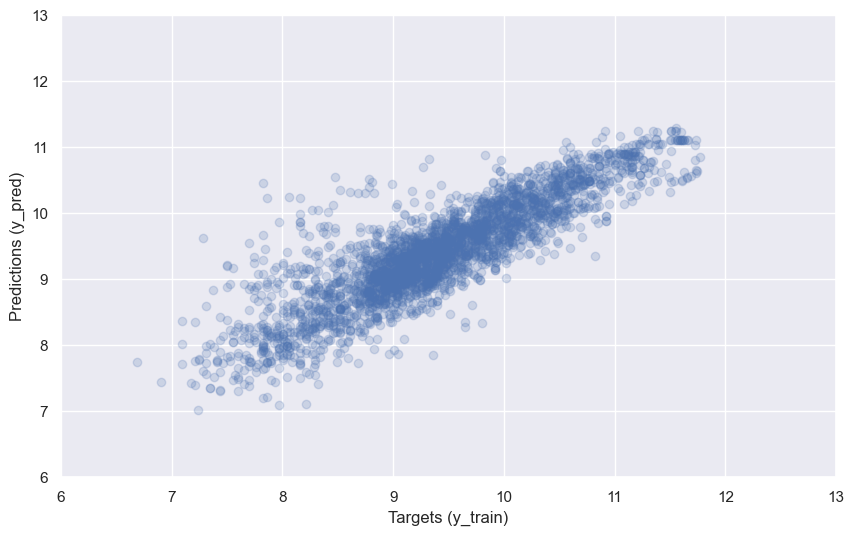

In [ ]:
# Đánh giá mô hình hồi quy tuyến tính cơ sở

# kiểm tra dự đoán với các giá trị ban đầu
y_pred_train = reg.predict(X_train)
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_pred_train, alpha=0.2);
plt.xlabel('Targets (y_train)');
plt.ylabel('Predictions (y_pred)');
plt.xlim(6,13);
plt.ylim(6,13);

Dự đoán đào tạo có vẻ tốt, nó không hoàn toàn ngẫu nhiên, tôi có thể quan sát tính tuyến tính trên biểu đồ
Một cách khác để kiểm tra `Residual` là sự khác biệt giữa mục tiêu và dự đoán.

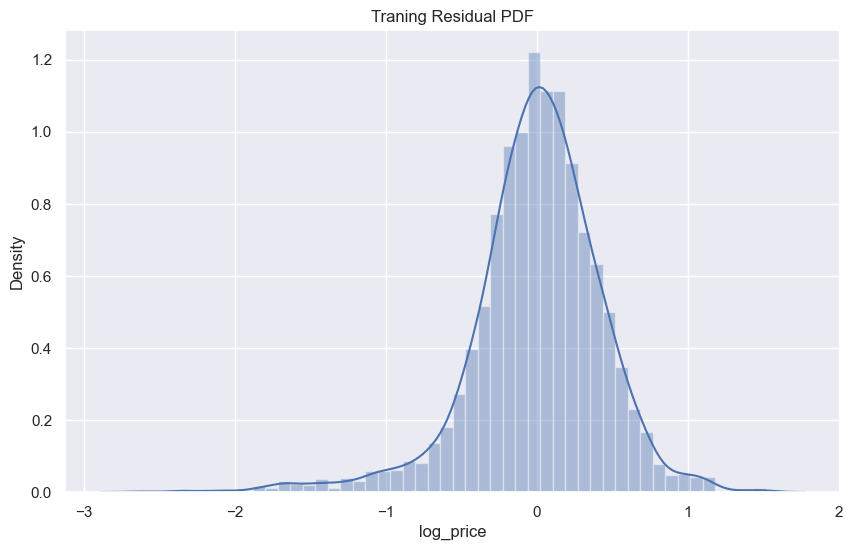

In [15]:
# vẽ biểu đồ phân phối của phần dư
residual_train = (y_train - y_pred_train)

# vẽ biểu đồ phân phối của phần dư
plt.figure(figsize=(10,6))
sns.distplot(residual_train);
plt.title('Traning Residual PDF');

Từ biểu đồ này, tôi có thể quan sát thấy rằng phần lớn giá trị nằm gần `0` vì giá trị trung bình là `0`. Tôi cho rằng mô hình hoạt động tốt hơn vì phần lớn sự khác biệt là `0`, mô hình đưa ra dự đoán dựa trên giá trị mục tiêu.

In [16]:
# Kiểm tra r2_score
from sklearn.metrics import r2_score

r2_score(y_train, y_pred_train)

0.7572893585761237

In [17]:
# Kiểm tra rmse
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(np.exp(y_train), np.exp(y_pred_train)))

np.float64(10165.94102867886)

Giá tối thiểu và tối đa là `800` và `129222` trên tập dữ liệu và mô hình tạo ra lỗi `10165`.

Mô hình  tạo ra không xuất sắc nhưng cũng không đến nỗi tệ.

Mô hình  đang xác định 75% sự thay đổi từ dữ liệu.

### Bây giờ tôi sẽ xem xét trọng số và độ lệch


In [18]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.462515
1,EngineV,0.213625
2,Brand_BMW,0.025071
3,Brand_Mercedes-Benz,0.023430
4,Brand_Mitsubishi,-0.128286
5,Brand_Renault,-0.174282
6,Brand_Toyota,-0.048213
7,Brand_Volkswagen,-0.077236
8,Body_hatch,-0.147790
9,Body_other,-0.103041


Đây là một kết quả rất tốt. Tất cả các giá trị đều dưới 5, nhưng cột log_price(cột mục tiêu của chúng ta) có VIF giá trị là 42. Điều này cho chúng ta biết rằng giá xe có mối tương quan cao với các cột khác, và đây là một dấu hiệu rất tốt.

`positive_weights` = giá trị tăng của tính năng cũng như giá sẽ tăng.

`negative_weights` = giá trị tăng của tính năng nhưng giá sẽ giảm.

## Đánh giá trên dữ liệu thử nghiệm

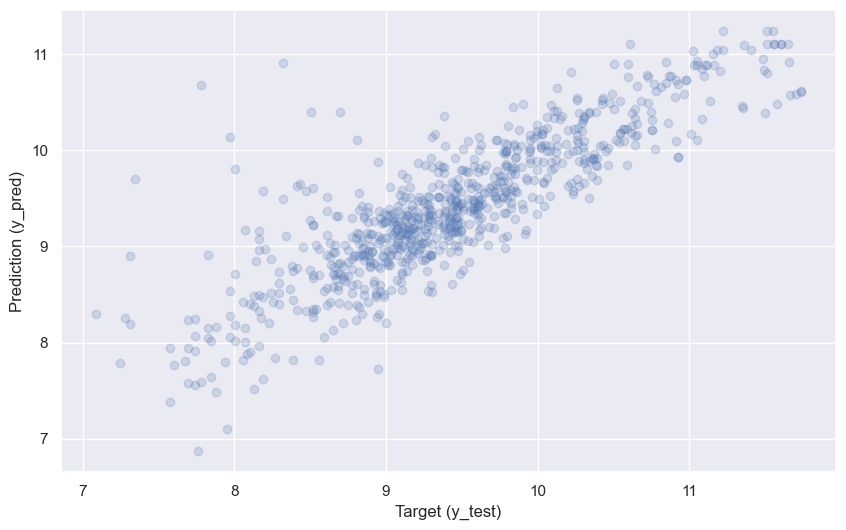

In [26]:
# dự đoán trên dữ liệu thử nghiệm

y_pred = reg.predict(X_test)

# vẽ đồ thị
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.2);

plt.xlabel('Target (y_test)');
plt.ylabel('Prediction (y_pred)');

In [27]:
# kiểm tra rmse trên dữ liệu thử nghiệm
np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

np.float64(11692.28821174843)

Trên dữ liệu thử nghiệm, nó tạo ra lỗi `11692`, điều này cho thấy mô hình có thể hoạt động không tốt lắm nhưng nó cũng không quá phù hợp vì nó hoạt động giống nhau trên dữ liệu đào tạo và thử nghiệm.

In [28]:
# Tạo một khung dữ liệu để so sánh kết quả và dự đoán.
df_eval = pd.DataFrame(np.exp(y_pred), columns=['Prediction']) # np.exp sẽ đảo ngược log_tranformation
# thêm cột
y_test = y_test.reset_index(drop=True)
df_eval['Tareget'] = np.exp(y_test)

# kiểm tra dữ liệu hiệu suất
df_eval

,Prediction,Tareget
0,18328.250265,19000.0
1,5256.283391,5500.0
2,22185.025441,19200.0
3,10102.190466,11900.0
4,4000.490570,7750.0
...,...,...
769,39166.491984,116500.0
770,6060.759191,13200.0
771,15649.805091,27500.0
772,11164.302749,16500.0


In [29]:
df_eval['Residual'] = df_eval['Tareget'] - df_eval['Prediction']
df_eval['Difference%'] = np.absolute(df_eval['Residual'] / df_eval['Tareget']*100)

# checking the data performance
df_eval

,Prediction,Tareget,Residual,Difference%
0,18328.250265,19000.0,671.749735,3.535525
1,5256.283391,5500.0,243.716609,4.431211
2,22185.025441,19200.0,-2985.025441,15.547008
3,10102.190466,11900.0,1797.809534,15.107643
4,4000.490570,7750.0,3749.509430,48.380767
...,...,...,...,...
769,39166.491984,116500.0,77333.508016,66.380694
770,6060.759191,13200.0,7139.240809,54.085158
771,15649.805091,27500.0,11850.194909,43.091618
772,11164.302749,16500.0,5335.697251,32.337559


Residual : Dư

Prediction : Dựự đoán

Tareget : Mục tiêu

Difference : SỰ khác biệt


In [32]:
df_eval.describe()

,Prediction,Tareget,Residual,Difference%
count,774.00,774.00,774.00,774.00
mean,16194.85,18602.02,2407.17,39.11
std,13265.84,20139.56,11449.21,97.37
min,964.00,1200.00,-50811.55,0.10
25%,7763.59,7500.00,-1827.31,11.63
50%,11715.38,11900.00,499.37,23.00
75%,20275.68,20999.06,3512.48,39.07
max,76339.58,125000.00,84484.67,1715.17


In [34]:
# lấy tất cả các giá trị.
pd.options.display.max_rows = 999
# thiết lập tất cả các giá trị hai chữ số sau dấu chấm.
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_eval.sort_values(by=['Difference%'])

,Prediction,Tareget,Residual,Difference%
411,22477.27,22500.00,22.73,0.10
633,12913.53,12900.00,-13.53,0.10
437,10818.26,10800.00,-18.26,0.17
522,23245.83,23200.00,-45.83,0.20
91,11525.19,11500.00,-25.19,0.22
589,7028.32,6999.00,-29.32,0.42
664,61761.13,61500.00,-261.13,0.42
446,9252.34,9200.00,-52.34,0.57
322,9239.70,9300.00,60.30,0.65
119,14901.42,15000.00,98.58,0.66


Mô hình dự đoán sai nhiều ở những xe giá thấp – cụ thể, dự đoán cao hơn giá thật.
Dựa vào biểu đồ PDF Residual, ta thấy đuôi nghiêng về phía âm → mô hình dự đoán vượt quá thực tế.
Có thể vì đã xóa cột Model lúc xử lý dữ liệu, hoặc thiếu thông tin như tình trạng hư hỏng của xe.

### Việc tiếp theo là tạo một mô hình khác và giữ nguyên Cột `Model`